# Data Analysis of Titanic Dataset.

### A few questions I hoped to answer with the dataset:
1. How many people survived?
2. What percentage of survivors were female?
3. What percentage of survivors were male?
4. If you were female and in first class were you more likely to survive?


### Gathering dataset for analysis.

#### Cleanup of dataset required replacing missing data values with "NaN".
#### Removing header (passenger id, survival...) in file
#### As a result of the cleanup statistics will be a bit skewed since statistics will not include NaN values (missing values).

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data_file = "/home/tchalla/Desktop/Project2/data/titanic-data.csv"
df_data = (pd.read_csv(data_file, names=["P_ID", "Survival","PC", "Name", "Sex",
               "Age", "Sibling", "Parent", "Ticket", "Fare", "Cabin", "Embarked"]))

### Some descriptive statistics about the data
#### Some helpful information regarding statistics
#### count: total number of individuals
#### unique represents values that an individual possesses
#### top represents most frequent unique value
#### freq represents frequency of the most frequent unique value

#### Passenger class statistics (below) shows there were 891 individuals in the set, each possessed 1 of 3 unique values, the unique value with the most occurence is "3", which occured 491 times.

In [48]:
print(df_data["PC"].astype(str).describe())
pc_s =  df_data["PC"]
first_class_count = pc_s[pc_s == 1].count()
print(first_class_count)


count     891
unique      3
top         3
freq      491
Name: PC, dtype: object
216


#### Sex statistics (below), shows there were 891 individuals in the set, each individual possessing 1 of 2 unique values, the unique value with the most occurence is "male" value, which occured 577 times. 

In [24]:
print(df_data["Sex"].describe())

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


#### Age statistics shows 714 individuals in the set, with a mean age of 29.7, a standard deviation of 14.2, youngest person at .42 year ( a baby), oldest person at 80. If you may have noticed the count statistic is different from the count statistic for passenger class, and sex. The reason for the discrepancy is some individuals were missing a value for age and so were not included in the statistical calculation and, as a result, results are not representative of the whole dataset.

In [25]:
print(df_data["Age"].dropna().describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


#### Fare Statistics: 891 individuals in the set, each paid on average 32 pounds for fare, standard deviation of 49.7 pounds, the lowest fare was 0 pounds, and highest fare was 512.33 pounds.

In [26]:
print(df_data["Fare"].describe())


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


#### Embarked statistics: 889 individuals in the set, embarked from 1 of 3 places, the location from where most individual embarked, "Southampton", 644 individuals embarked from Southampton. Once again a discrepancy between embarked count and count of dataset. Due to missing values for 2 individuals, they were not included in the calculation.

In [13]:
print(df_data["Embarked"].describe())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


#### Survivors statistics
#### first set of statistics: Passenger class
#### second set of statistics: Age, count statistic is skewed due to missing values omitted in the calculation
#### third set of statistics: Fare

In [46]:
s_df = df_data[df_data.Survival == 1]
print(s_df["Sex"].describe())
print("")
print(s_df["PC"].astype(str).describe())
print("")
print(s_df["Age"].dropna().describe())
print("")
print(s_df["Fare"].describe())

count        342
unique         2
top       female
freq         233
Name: Sex, dtype: object

count     342
unique      3
top         1
freq      136
Name: PC, dtype: object

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


#### While exploring the statistics, I noticed that women who were 35 percent of occupants but were 68 percent of survivors while male occupants were 65 percent of total occupancy but 32 percent of survivors (Visualization below illustrates this finding). Also, 74 percent of all women on the boat survived while only 19 percent of all male occupants. Which means being female most likely played a huge factor in an individuals survival. I will continue looking at other factors and see if they had as big of an impact on survival as  much as the sex of the individual. 

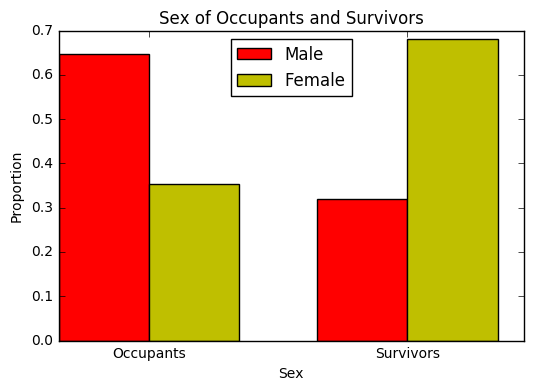

In [69]:
s_sex_df = df_data[df_data.Survival == 1]

s_sex_df = s_sex_df["Sex"] # series of survivors' sex
sex_df = df_data["Sex"] # series of occupants' sex

m_df = sex_df[sex_df == "male"].count()/891.    # proportion of male occupants
f_df = sex_df[sex_df == "female"].count()/891.  # proportion of female occupants

sm_df = s_sex_df[s_sex_df == "male"].count()/342.   # proportion of male survivors
sf_df = s_sex_df[s_sex_df == "female"].count()/342.   # proportion of female survivors

# plot of occupant and survivor proportions pertaining to sex

fig, x = plt.subplots()
males = x.bar([0,1], [m_df, sm_df], .35, color='r')
females = x.bar([.35, 1.35], [f_df, sf_df], .35, color='y')

x.set_xticks([.35,1.35])
x.set_xticklabels(('Occupants','Survivors'))
x.set_ylabel("Proportion")
x.set_xlabel("Sex")
x.set_title("Sex of Occupants and Survivors")
x.legend((males[0], females[0]), ('Male', 'Female'), loc =  "best")

plt.show()

#### 1st class passengers were 24 percent of occupants but were 40 percent of survivors, also a big margin (visualization illustrated below). It seems passenger class as well played a role in survival. Also, 63 percent of first class passenger survived. When compared to second and third class passengers at 47 percent and 24 percent, respectively that is significant. I won't go as far as to say it played as big a role as the sex of the individual but the statistics do show that a greater percentage of first class passengers survived. 

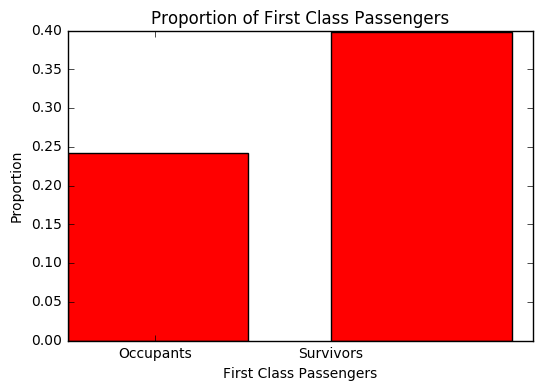

In [89]:
fcp_df = df_data[df_data.PC == 1]     # dataframe of first class passengers
sfcp_df = df_data[(df_data.PC ==1) & (df_data.Survival == 1)]    # dataframe of survivors first class passengers

prop_fcp = fcp_df["PC"].count()/891.     # proportion of first class passengers
prop_sfcp = sfcp_df["PC"].count()/342.   # proportion of survivors of first class 

plt.bar([0,.51], [prop_fcp, prop_sfcp], .35, color='r')
plt.xticks([.17,.51], ['Occupants','Survivors'])
plt.ylabel("Proportion")
plt.xlabel("First Class Passengers")
plt.title("Proportion of First Class Passengers")


plt.show()

 #### Occcupant average fare: 32.2 pounds, and survivor average fare: 48.4 pounds also well within one standard deviation as expected so nothing significant to find here.

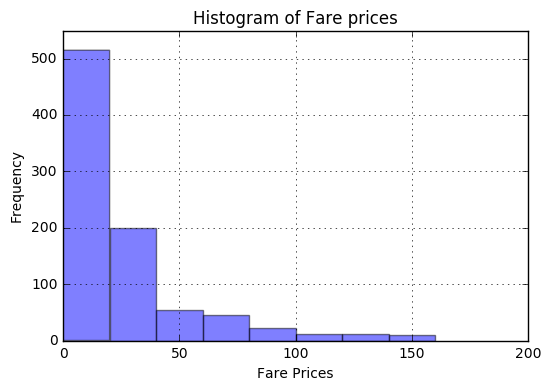

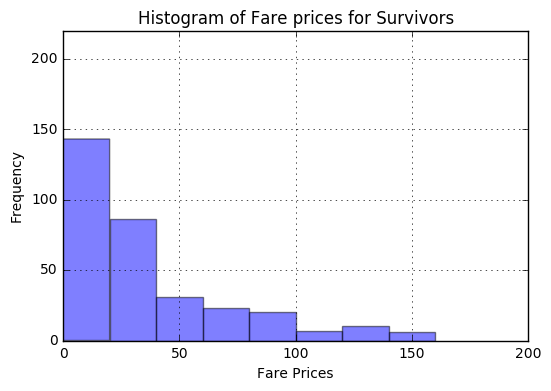

In [78]:
survivors_df = df_data[df_data.Survival == 1]
sfare_df = survivors_df["Fare"]   # series of fare prices for survivors 
fare_df = df_data["Fare"]     # series of fare prices for all occupants

bins = [0,20,40,60,80,100,120,140,160]
fig, y = plt.subplots()
y.hist(fare_df, bins, alpha=0.5)
y.set_xlabel("Fare Prices")
y.set_ylabel("Frequency")
y.set_title("Histogram of Fare Prices for all Occupants")
y.axis([0, 200, 0, 550])
y.grid(True)
plt.show()

# Histogram of fare prices for female survivors
fig, a = plt.subplots()
a.hist(sfare_df, bins, alpha=0.5)
a.set_xlabel("Fare Prices")
a.set_ylabel("Frequency")
a.set_title("Histogram of Fare prices for Survivors")
a.axis([0, 200, 0, 220])
a.grid(True)

plt.show()


#### My next intuition was to explore females and first class passengers. While exploring, female first class passengers made up 10 percent of total passenger but 26 percent of total survivors which is a big leap. What struck me as more unbelievable was that that the percentage of female first class passengers that survived was a whopping 97 percent. If you were a female in first class you were almost guaranteed survival. 

0.105499438833  0.266081871345


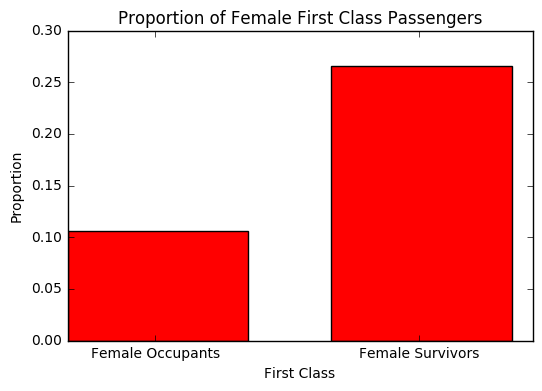

In [98]:
female_fc = df_data[(df_data.Sex == "female") & (df_data.PC == 1)]
female_survivors_fc = df_data[(df_data.Survival == 1) & (df_data.Sex == "female") & (df_data.PC == 1)]

prop_femfc = female_fc["P_ID"].count()/891.
prop_femsfc = female_survivors_fc["P_ID"].count()/342.
print("{}  {}" .format(prop_femfc, prop_femsfc))

plt.bar([0,.51], [prop_femfc, prop_femsfc], .35, color='r')
plt.xticks([.17,.68], ['Female Occupants','Female Survivors'])
plt.ylabel("Proportion")
plt.xlabel("First Class")
plt.title("Proportion of Female First Class Passengers")


plt.show()

### Conclusion
####  To begin some inconsistencies that had to needed to be resolved. Some of our variables were missing values. Those variables included age, cabin, ticket. In cases of missing values, the statistic was calculated without these values. Implicaton, some of our results were not based on a full dataset. After much analysis, I have come to the conclusion that the most significant indicator of survival was not how much one paid for the trip but their sex and class. If you were female, your chances of survival were much higher. I questioned fare price's role in increasing the odds of survival but, after review of female survivors' statistic, most of the female survivors were of the third class. This only strengthens, the case that most survivors were helped by their gender specification, not fare. Another variable that indicated a higher chance of survival was passenger class. I found passenger class in combination with gender yielded the best chance of survival. If you were female and a first class passenger your chances of survival were very high, 97 percent to be exact. I don't believe any other combination of variables could yield survival percentage as high as that of the female gender and first class passenger class but it's worth exploring.